# <center> Dam Break Test Case </center>
## <center> SPH Project </center>
### <center> Free surface detector </center>

<center> Based on the work of Rémi Carmigniani et Damien Violeau </center>
<center> Density diffusion added by Ludovic Druette and Théo Contentin </center>

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sys import exit
import os.path
from os import path
import csv
import time
import matplotlib
import matplotlib.pyplot as plt
from src.spyh import *
from src.sphvar import *
from src.plotParticles import *
from src.state import *
from src.contrib import *
from src.freeSurface import *

In [2]:
current_directory = os.getcwd()
results_directory = os.path.join(current_directory, r'Results')
try:
    os.mkdir(results_directory)
except FileExistsError:
    pass

case_directory = os.path.join(results_directory, r'FreeSurface_'+time.strftime("%Y%m%d_%H%M%S"))
os.mkdir(case_directory)
data_directory = os.path.join(case_directory,r'Data')
figures_directory = os.path.join(case_directory,r'Figures')
os.mkdir(data_directory)
os.mkdir(figures_directory)

In [3]:
import scipy.io as sio
validation = sio.loadmat('.dam_break/validation/Data_Table_Martin_1952_n2_2.mat')

In [4]:
#FLUID PARAMETERS
rhoF = 1000
c0 = 40
gamma = 7
B = rhoF*c0**2/gamma
grav = np.array([0,-9.81]) 
#ARTIFICIAL VISCOSITY (voir plus loin)
alpha = 0.3
esp=10**(-6) #and it is multiplied by dr**2 in the code
#DENSITY DIFFUSION
densityDiffusion = True
delta = 0.2
#DENSITY & SHEPARD THRESHOLDS : 
shepardMin = 10**(-6)
rhoMin = 0.5*rhoF
rhoMax = 1.5*rhoF
#GEOMETRY
Lx = 2
Ly = 2
lx = 0.5
ly=1

In [5]:
#PARTICLES & SPACES PARAMETERS : 
dr = ly/30

In [6]:
h = smthfc*dr
m=dr*dr*rhoF
lspace = 2*h
#COMPUTATION DOMAIN : 
xOrigin = -nBound*dr
yOrigin = -nBound*dr
xSize = Lx+2*nBound*dr
ySize = Ly+2*nBound*dr
xMax = xOrigin+xSize
yMax = yOrigin+ySize
#INIT SPACES & PART:
posSpace,neibSpace,partSpace,listNeibSpace = \
init_spaces(xOrigin,yOrigin,xSize,ySize,lspace,dr)
part = init_particles()
part = addBox(part,[lx,ly],FLUID,dr,rhoF)
part = addBox(part,[-nBound*dr,-nBound*dr,Lx+2*nBound*dr,nBound*dr],BOUND,dr,rhoF)
part = addBox(part,[-nBound*dr,0,nBound*dr,Ly],BOUND,dr,rhoF)
part = addBox(part,[Lx,0,nBound*dr,Ly],BOUND,dr,rhoF)
part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)

In [7]:
#time, iteration count and im_count
t = 0
it=0
im_count=0
#Prepare table to compare with experiments
simvaluesTHX = np.empty((0,3),float)
Hmax = np.max(part[part[:,INFO]==FLUID,POS[1]])+dr*0.5
Xmax = np.max(part[part[:,INFO]==FLUID,POS[0]])+dr*0.5
simvaluesTHX= np.append(simvaluesTHX,[[t,Hmax,Xmax]],axis=0)
# Here we specify the output frequencies
dt_figure = 2./100.*(ly/np.linalg.norm(grav))**.5
t_print = 0
#final time :
t_end = 10

<IPython.core.display.Javascript object>


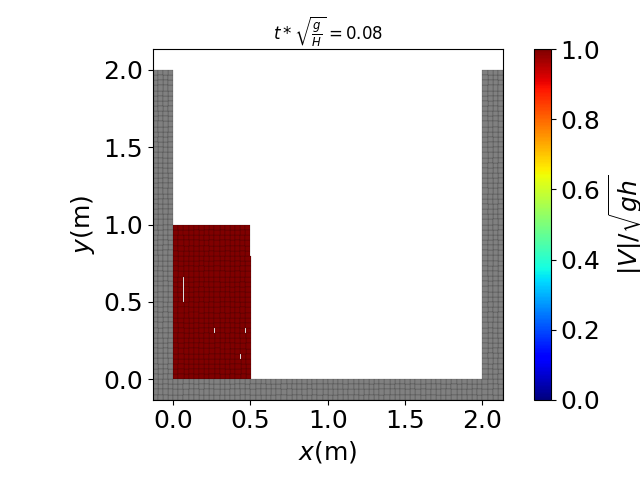

[0.99910582 0.99901223]
[0.99916201 0.99917289]
[0.99908575 0.99900858]
[0.99915426 0.99910873]
[0.99917295 0.99917791]
[0.99919942 0.9991994 ]
[0.99917986 0.99911388]
[0.99919825 0.99918458]
[0.99917516 0.99919301]
[0.99919313 0.9991841 ]
[0.99917439 0.99911341]
[0.99910137 0.99901191]
[0.99916041 0.9991567 ]
[0.99914128 0.99909402]
[0.99907757 0.99899761]
[0.99919445 0.99919896]
[0.99919927 0.99919932]
[0.99919927 0.99919932]
[0.99916223 0.99917385]
[0.99916223 0.9991739 ]
[0.99916223 0.99917389]
[0.99919927 0.99919934]
[0.99917523 0.99919314]
[0.99919931 0.99919946]
[0.99917524 0.99919325]
[0.99919437 0.99919903]
[0.99919434 0.99919891]
[0.99919433 0.99919889]
[0.99916223 0.99917389]
[0.99917523 0.99919314]
[0.99917523 0.99919317]
[0.99919433 0.99919889]
[0.99916223 0.99917389]
[0.99917523 0.99919314]
[0.99917523 0.99919314]
[0.99919433 0.99919889]
[0.99916223 0.99917389]
[0.99916223 0.99917389]
[0.99919433 0.99919889]
[0.99919433 0.99919889]
[0.99919927 0.99919932]
[0.99919927 0.99

<IPython.core.display.Javascript object>


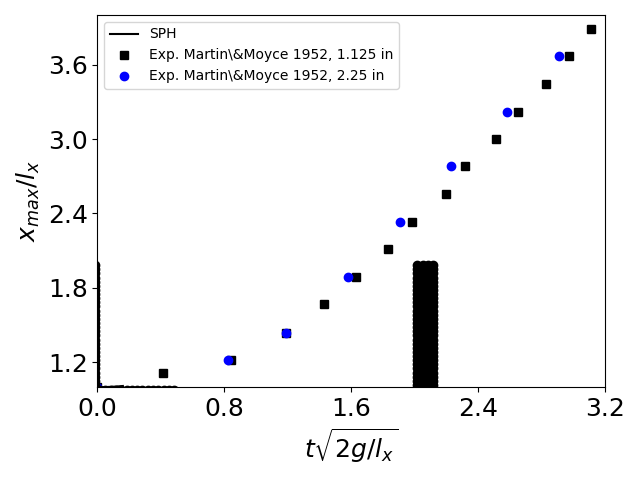

<IPython.core.display.Javascript object>


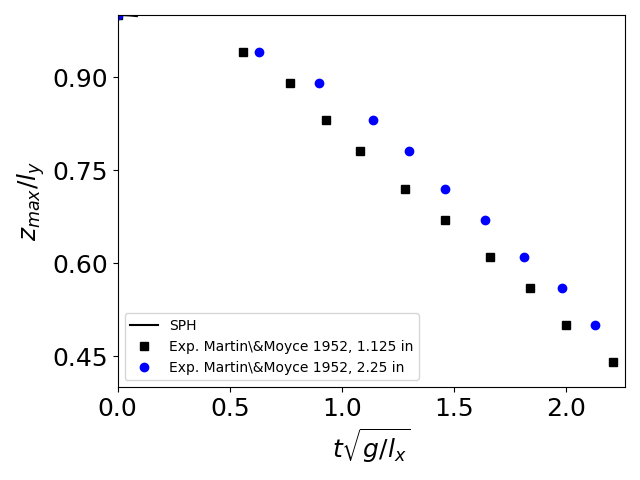

[0.99890805 0.99857858]
[0.99897262 0.99923183]
[0.99896672 0.99934236]
[0.99922328 0.99915257]
[0.99926983 0.99920862]
[0.99923468 0.99852963]
[0.99892466 0.99905493]
[0.99921043 0.99929765]
[0.99898532 0.9992042 ]
[0.99867222 0.99848631]
[0.99920847 0.99918038]
[0.99920773 0.99933641]
[0.99927119 0.99924014]
[0.99921832 0.99855689]
[0.99883076 0.99913981]
[0.998741   0.99904515]
[0.99924267 0.99918767]
[0.99904544 0.99908188]
[0.99923908 0.99919157]
[0.99909546 0.99906661]
[0.9992381  0.99917344]
[0.99923934 0.99919131]
[0.99900709 0.99920976]
[0.99899706 0.99907043]
[0.99900205 0.99921012]
[0.99919689 0.99920728]
[0.99917901 0.99921925]
[0.99900562 0.99921739]
[0.99918176 0.99922188]
[0.99911578 0.99906707]
[0.99918965 0.99922095]
[0.9990063  0.99921433]
[0.99913584 0.99906643]
[0.99913992 0.99906631]
[0.99900814 0.99920945]
[0.99900765 0.99920876]
[0.99918101 0.99922585]
[0.99912869 0.9990667 ]
[0.99918031 0.99922454]
[0.99917954 0.9992226 ]
[0.99925299 0.99919399]
[0.99925161 0.99

[0.92681367 0.70014389]
[0.92681385 0.70014367]
[0.92681378 0.70014414]
[0.9430306  0.99457066]
[0.94472491 0.99532684]
[0.7785055  0.97832104]
[0.49953493 0.68467273]
[0.71866982 0.9481146 ]
[0.94312235 0.994691  ]
[0.70038619 0.92681069]
[0.95816032 0.99722831]
[0.52416256 0.78982261]
[0.70118136 0.92840333]
[0.50159268 0.70079814]
[0.58489116 0.91313221]
[0.94293227 0.99465446]
[0.94293817 0.99465428]
[0.94295341 0.99464467]
[0.4995725  0.68464474]
[0.94298179 0.99460687]
[0.49958953 0.68458923]
[0.49958488 0.68461126]
[0.70015746 0.92681006]
[0.70017496 0.92681289]
[0.70021184 0.9268093 ]
[0.7002806  0.92679703]
[0.49959306 0.68457313]
[0.70014943 0.92680992]
[0.70014571 0.92681111]
[0.49959878 0.68455596]
[0.70014408 0.92681202]
[0.49959568 0.68456424]
[0.70014348 0.9268126 ]
[0.49959821 0.68455724]
[0.94293047 0.99466015]
[0.94293113 0.99466348]
[0.94293068 0.99465701]
[0.49959727 0.68455969]
[0.94293073 0.99466223]
[0.70014336 0.92681366]
[0.7001433  0.92681334]
[0.70014332 0.92

[0.99917968 0.99920125]
[0.99917097 0.99920423]
[0.99919894 0.99920073]
[0.99919796 0.99919901]
[0.99919641 0.99919881]
[0.99920044 0.99919948]
[0.99919842 0.99919819]
[0.99919444 0.99919775]
[0.99919546 0.99919823]
[0.99919718 0.99919927]
[0.99919813 0.99919867]
[0.99919711 0.99919828]
[0.99919562 0.99919797]
[0.99919348 0.99919788]
[0.99919978 0.99919904]
[0.99919906 0.99919855]
[0.99920002 0.99919912]
[0.99919755 0.99919847]
[0.99919858 0.9991984 ]
[0.99919933 0.99919878]
[0.99919909 0.99919874]
[0.99919947 0.99919909]
[0.99919971 0.99919923]
[0.99919984 0.99919932]
[0.99920054 0.99919944]
[0.99919781 0.99920015]
[0.99920131 0.99920021]
[0.99919757 0.99919996]
[0.99919784 0.99920002]
[0.9992012  0.99920023]
[0.9992012  0.99920019]
[0.99920088 0.99919971]
[0.99919762 0.99919974]
[0.99920108 0.99919982]
[0.99920107 0.99919975]
[0.99920092 0.99919988]
[0.99466421 0.94293641]
[0.99920075 0.99919526]
[0.9992012  0.99920014]
[0.99920081 0.99920141]
[0.99920104 0.9992006 ]
[0.99920132 0.99

[0.70073241 0.92673101]
[0.49946292 0.68460214]
[0.70090982 0.92672888]
[0.49950602 0.68458244]
[0.49952323 0.68457832]
[0.49953782 0.6845759 ]
[0.49955001 0.68457387]
[0.70032502 0.92677404]
[0.94302306 0.9946124 ]
[0.94300364 0.99462186]
[0.94298748 0.99462987]
[0.70043249 0.9267577 ]
[0.70037324 0.92676596]
[0.70028544 0.92678112]
[0.94304682 0.99460211]
[0.94297408 0.99463631]
[0.49957498 0.68456597]
[0.49956011 0.68457162]
[0.94295417 0.99464585]
[0.49956836 0.68456898]
[0.94296306 0.99464155]
[0.49958023 0.68456275]
[0.70022658 0.9267915 ]
[0.94294723 0.9946493 ]
[0.700253   0.92678689]
[0.7002053 0.9267951]
[0.70018846 0.92679781]
[0.70015872 0.9268031 ]
[0.49959014 0.6845546 ]
[0.70015382 0.92680424]
[0.70017544 0.92679991]
[0.49958434 0.6845596 ]
[0.49958757 0.68455687]
[0.94293556 0.99465635]
[0.49959211 0.68455303]
[0.7001657  0.92680174]
[0.94294195 0.99465213]
[0.94293375 0.99465754]
[0.94293814 0.99465463]
[0.70014886 0.92680389]
[0.94293242 0.99466195]
[0.94293249 0.9946

KeyboardInterrupt: 

In [8]:
%matplotlib notebook
while t<t_end:
    #STEP1 : Calcul de la CFL
    dt = CFLConditions(part[:,VEL],h,c0,grav)
    #STEP2 : Interpolation des conditions au bord
    part[:,RHO],part[:,VEL] =interpolateBoundary((part[:,INFO]==BOUND),\
                                     part[:,SPID],\
                                     part[:,POS],\
                                     part[:,VEL],\
                                     part[:,RHO],\
                                     listNeibSpace,\
                                 aW,h,m,B,rhoF,gamma,grav,shepardMin)
    #STEP3 : Calcul des forces et des termes de densité
    part[:,FORCES],part[:,DRHODT] = computeForcesART((part[:,INFO]==FLUID),\
                                                 part[:,SPID],\
                                                 part[:,POS],\
                                                 part[:,VEL],\
                                                 part[:,RHO],\
                                                 listNeibSpace,\
                                                 aW,h,m,B,rhoF,gamma,grav,alpha,esp,dr,\
                                                 c0,delta, densityDiffusion=densityDiffusion)
    #STEP4 : Integration en temps
    part[:,POS],part[:,VEL],part[:,RHO] = integrationStep((part[:,INFO]==FLUID),\
                                                       part[:,POS],\
                                                       part[:,VEL],\
                                                       part[:,RHO],\
                                                       part[:,FORCES],\
                                                       part[:,DRHODT],\
                                                     dt)
    #STEP5 : Corriger densité trop basse
    part[:,RHO] = checkDensity(part[:,RHO],rhoMin,rhoMax)
    #STEP6 : Mise à jour des voisins (pas forcément à tous les pas de temps)
    part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
    listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)
    t +=dt
    it +=1
    if t>=t_print:
        fig = plt.figure(1)
        plt.clf()
        plt.title(r'$t*\sqrt{\frac{g}{H}} = %2.2f$'%(t*(np.linalg.norm(grav)/ly)**.5))
        velMagn = (part[:,VEL[0]]*part[:,VEL[0]]+part[:,VEL[1]]*part[:,VEL[1]])**.5/(ly*np.linalg.norm(grav))**.5
        # Free surface computation
        lambdas, isolatedPart, freeSurfacePart = freeSurfaceDetection(\
            part[:,INFO]==FLUID,\
            part[:,SPID],\
            part[:,POS],\
            part[:,RHO],\
            listNeibSpace,\
            aW,\
            h,\
            m)
        freeSurfaceMagn = np.zeros_like(part[:,RHO])
        freeSurfaceMagn[isolatedPart] = 1
        freeSurfaceMagn[freeSurfacePart] = 2
        domain = [xOrigin,xMax,yOrigin,yMax,0,1]
        plotPropertiesWithBound(part,freeSurfaceMagn,r'$\left|V\right|/\sqrt{g h}$',domain,dr,1)
        figname = os.path.join(figures_directory,r'vel_%06d.png'%im_count)
        im_count = im_count+1
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
        #extract front
        Hmax = np.max(part[part[:,INFO]==FLUID,POS[1]])+dr*0.5
        Xmax = np.max(part[part[:,INFO]==FLUID,POS[0]])+dr*0.5
        simvaluesTHX= np.append(simvaluesTHX,[[t,Hmax,Xmax]],axis=0)
        #plot figure of t and Xmax
        fig = plt.figure(2)
        plt.clf()
        plt.plot(simvaluesTHX[:,0]*(2*np.linalg.norm(grav)/lx)**.5,simvaluesTHX[:,2]/lx,'-k',label=r'SPH')
        plt.plot(validation["damb2ZT"][:,1],validation["damb2ZT"][:,0],'ks', label=r'Exp. Martin\&Moyce 1952, 1.125 in')       
        plt.plot(validation["damb1ZT"][:,1],validation["damb1ZT"][:,0],'bo',label = r'Exp. Martin\&Moyce 1952, 2.25 in')
        plt.xlabel('$t\sqrt{2g/l_x}$',fontsize=18)
        plt.ylabel('$x_{max}/l_x$',fontsize=18)
        plt.xlim(0,3.2)
        plt.ylim(1,4) 
        ax = plt.gca()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show(block=False)
        plt.draw()
        figname = os.path.join(case_directory,r'graph_xt.pdf')
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
        #plot figure of t and Hmax
        fig = plt.figure(3)
        plt.clf()
        plt.plot(simvaluesTHX[:,0]*(np.linalg.norm(grav)/lx)**.5,simvaluesTHX[:,1]/ly,'-k',label=r'SPH')
        plt.plot(validation["damb2HT"][:,1],validation["damb2HT"][:,0],'ks',label=r'Exp. Martin\&Moyce 1952, 1.125 in')           
        plt.plot(validation["damb1HT"][:,1],validation["damb1HT"][:,0],'bo',label =r'Exp. Martin\&Moyce 1952, 2.25 in')
        plt.xlabel('$t\sqrt{g/l_x}$',fontsize=18)
        plt.ylabel('$z_{max}/l_y$',fontsize=18)
        plt.xlim(0,3.2/2**.5)
        plt.ylim(0.4,1) 
        ax = plt.gca()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        plt.legend(loc='lower left')
        plt.tight_layout()
        plt.show(block=False)
        plt.draw()
        figname = os.path.join(case_directory,r'graph_ht.pdf')
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
        t_print = t_print+dt_figure

In [22]:
 lambdas, isolatedPart, freeSurfacePart = freeSurfaceDetection(\
            part[:,INFO]==FLUID,\
            part[:,SPID],\
            part[:,POS],\
            part[:,RHO],\
            listNeibSpace,\
            aW,\
            h,\
            m)

0.9971436675121893
0.9975303169664128
0.9976896029899075
0.9981053026642926
0.9990973668380283
0.9990482476276116
0.9987957240192368
0.9987945665216522
0.9987553758765448
0.9986760526952209
0.9989096268570742
0.9991150724670539
0.9991733757813445
0.9979511195024846
0.9979156657331314
0.9981839584488607
0.9992328325606488
0.9992138280937675
0.998077426106793
0.9992186505345517
0.9992593858470832
0.9992295616024792
0.9992877834015299
0.9991742566406915
0.9991419845786416
0.9990246618519025
0.9979520419423279
0.9980335578848881
0.9979802348012001
0.9990034002408326
0.9989933060085353
0.9989700682462987
0.9982020809469913
0.9989371090401039
0.9990422828021119
0.9989916728925631
0.9992655521062032
0.9990672154518246
0.9990945061565433
0.9991229463623211
0.9992523274038718
0.9992481851383215
0.9990429952391406
0.9981739236657606
0.9981436483128528
0.9981113711828379
0.9992474615077216
0.9990927447303536
0.9992462934472006
0.9992490903724148
0.9987038645479414
0.9992468932136864
0.99922780612

In [26]:
lambdas[flag]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<IPython.core.display.Javascript object>


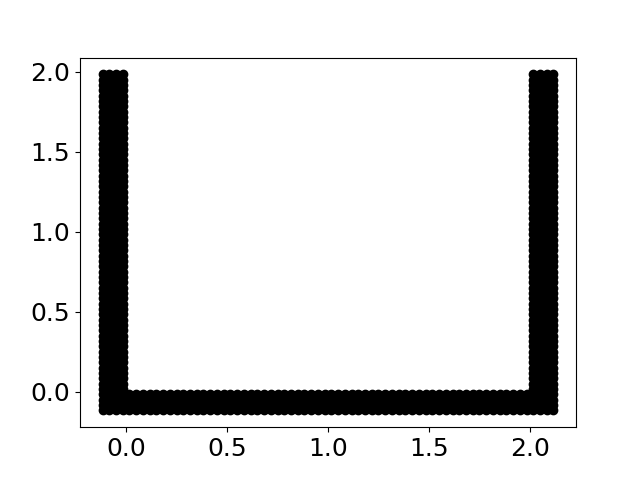

In [25]:
flag = (lambdas > 0.75)
plt.figure()
plt.plot(part[flag,POS[0]],part[flag,POS[1]],"ok")
plt.show()

In [30]:
print(isolatedPart)

[272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487,

In [31]:
print(lambdas[isolatedPart])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
